In [1]:
import torch 
import torch.nn as nn

import numpy as np
import pandas as pd
#import torch 
#import torch.nn as nn
import matplotlib.pyplot as plt
import warnings
#from sklearn.model_selection import train_test_split


In [2]:
from pd.nn.model import Conv
from pd.metric import amex_metric
from pd.data.loader import CustomerData, DataLoader
from pd.params import *
from pd.pred import pred_test_npy


In [3]:
data_dir = OUTDIR + "pd_lgbm_feat_trans__ght1pi1/"
import glob
files = glob.glob(data_dir+"oof_lgbm_baseline_2fold_seed42_*.csv")

data = pd.read_csv(data_dir+"oof_lgbm_baseline_2fold_seed42.csv")

In [4]:
#for fdir in files:
#    data[]
for f in files:
    df = pd.read_csv(f)
    data[df.columns[0]] = df[df.columns[0]]

/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_40419/4062239063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[df.columns[0]] = df[df.columns[0]]
/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_40419/4062239063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[df.columns[0]] = df[df.columns[0]]
/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_40419/4062239063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [51]:
data

,customer_ID,target,D_124,D_81,D_50,B_37,D_45,D_109,B_20,D_140,...,S_8,D_46,D_58,D_122,D_126,D_83,D_63,B_29,R_3,D_51
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.300378,0.257368,0.163501,0.122973,0.197915,0.293117,0.124314,0.272010,...,0.124521,0.187688,0.173656,0.228618,0.272977,0.253315,0.359062,0.295753,0.172025,0.061715
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.220659,0.257528,0.341581,0.165804,0.196310,0.292490,0.123678,0.271069,...,0.320611,0.212026,0.082227,0.271827,0.271874,0.252600,0.419863,0.294780,0.212669,0.100263
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.234569,0.257528,0.341581,0.079703,0.174259,0.292490,0.123678,0.271069,...,0.152276,0.202265,0.122288,0.342314,0.271874,0.252600,0.419863,0.294780,0.170585,0.160865
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.325749,0.257528,0.095682,0.256496,0.386565,0.292490,0.123678,0.271069,...,0.401980,0.168278,0.113478,0.266747,0.271874,0.252600,0.419863,0.294780,0.248176,0.257508
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.220679,0.257368,0.231843,0.074861,0.173456,0.293117,0.124314,0.272010,...,0.267331,0.257610,0.356312,0.228618,0.272977,0.253315,0.407932,0.295753,0.201479,0.279499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0,0.237945,0.257528,0.341581,0.127871,0.412144,0.292490,0.123678,0.271069,...,0.205438,0.226265,0.106783,0.184708,0.271874,0.252600,0.419863,0.294780,0.486636,0.112394
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0,0.229717,0.257368,0.180313,0.515397,0.168948,0.293117,0.478467,0.272010,...,0.348009,0.239159,0.418882,0.268949,0.272977,0.253315,0.407932,0.295753,0.212552,0.122594
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0,0.255652,0.257368,0.143870,0.200746,0.266988,0.293117,0.172772,0.272010,...,0.124494,0.314794,0.088757,0.344559,0.272977,0.253315,0.407932,0.295753,0.240991,0.130741
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1,0.332922,0.257528,0.341581,0.119195,0.257795,0.292490,0.329601,0.271069,...,0.414683,0.340837,0.317578,0.360752,0.271874,0.252600,0.419863,0.294780,0.255430,0.381021


In [156]:
import torch.nn.functional as F

class AdditiveAttention(nn.Module):
    def __init__(self, hidden_dim: int) -> None:
        super(AdditiveAttention, self).__init__()
        self.query_proj = nn.Linear(hidden_dim, hidden_dim, bias=False)
        self.key_proj = nn.Linear(hidden_dim, hidden_dim, bias=False)
        self.bias = nn.Parameter(torch.rand(hidden_dim).uniform_(-0.1, 0.1))
        self.score_proj = nn.Linear(hidden_dim, 1)

    def forward(self, query, key, value):
        score = self.score_proj(torch.tanh(self.key_proj(key) + self.query_proj(query) + self.bias)).squeeze(-1)
        attn = F.softmax(score, dim=-1)
        context = attn.unsqueeze(1) * value
        return context, attn

class DotProductAttention(nn.Module):
    """
    Compute the dot products of the query with all values and apply a softmax function to obtain the weights on the values
    """
    def __init__(self, hidden_dim):
        super(DotProductAttention, self).__init__()

    def forward(self, query: torch.Tensor, value: torch.Tensor):
        batch_size, hidden_dim, input_size = query.size(0), query.size(2), value.size(1)

        score = query * value.transpose(0, 1)
        attn = F.softmax(score.view(-1, input_size), dim=1).view(batch_size, -1, input_size)
        context = torch.bmm(attn, value)

        return context, attn

class MLP(ESModule):
    def __init__(self, input_dim, hidden_dim=128,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.nf1 = nn.LayerNorm([hidden_dim])
        self.att = AdditiveAttention(hidden_dim=128, )        
        self.nf2 = nn.LayerNorm([hidden_dim])
        self.fcout = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def forward(self, h, return_featues=False):
        h = F.selu(self.fc1(h))
        h = self.nf1(h)
        r, att = self.att(h, h, h)
        h = self.nf2(h+r) 
        if return_featues:
            return torch.sigmoid(self.fcout(h)), h
        
        return torch.sigmoid(self.fcout(h))

In [164]:
class MLP(ESModule):
    def __init__(self, input_dim, hidden_dim=128,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.nf1 = nn.LayerNorm([hidden_dim])
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf2 = nn.LayerNorm([hidden_dim])
        
        self.fc3 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf3 = nn.LayerNorm([hidden_dim])
                
        self.fcout = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def forward(self, h, return_featues=False):
        h = F.selu(self.fc1(h))
        h = self.nf1(h)
        r = F.selu(self.fc2(h))
        r = self.nf2(r)
        h = F.selu(self.fc3(h+r))
        h = self.nf3(h)
        h = h+r
        if return_featues:
            return torch.sigmoid(self.fcout(h)), h
        
        return torch.sigmoid(self.fcout(h))

In [165]:
from sklearn.model_selection import train_test_split


In [166]:
X = data[data.columns[2:]].values
train_labels = data["target"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=1/9, random_state=0, shuffle=True)
validation_data = (X_test, y_test)

train_dataset = CustomerData(X_train, train_labels=y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
    

In [172]:
model = MLP(input_dim=X.shape[-1])
optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.001)
criterion = torch.nn.BCELoss()


for epoch in range(50): 
    for idx, (feat, clabel) in enumerate(train_loader):
        if len(feat.shape) == 4:  ## Reduce shape if its coming from a ratio version of the loader
            feat = feat.squeeze(dim=0)
            clabel = clabel.squeeze(dim=0)

        pred = model(feat)
        #weight = clabel.clone()
        #weight[weight==0] = 4
        #criterion.weight = weight
        loss = criterion(pred, clabel)
        
        # Update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model_metric = amex_metric(clabel.detach().numpy(), pred.detach().numpy())
        val_metrix = 0
        if model_metric > 0.78:
            X_test, y_test = validation_data
            val_features = torch.as_tensor(X_test, dtype=torch.float32)
            val_pred = model(val_features)
            val_metrix = amex_metric(y_test, val_pred.detach().numpy())

        log_message = f"{epoch}, BCE loss: {loss.item():.3f}, amex train: {model_metric:.3f}, val {val_metrix:.3f}"
        print(log_message)    

0, BCE loss: 0.693, amex train: -0.178, val 0.000
0, BCE loss: 0.995, amex train: 0.299, val 0.000
0, BCE loss: 0.815, amex train: 0.585, val 0.000
0, BCE loss: 0.545, amex train: 0.650, val 0.000
0, BCE loss: 0.477, amex train: 0.644, val 0.000
0, BCE loss: 0.599, amex train: 0.652, val 0.000
0, BCE loss: 0.570, amex train: 0.635, val 0.000
0, BCE loss: 0.466, amex train: 0.652, val 0.000
0, BCE loss: 0.423, amex train: 0.633, val 0.000
0, BCE loss: 0.445, amex train: 0.638, val 0.000
0, BCE loss: 0.466, amex train: 0.653, val 0.000
0, BCE loss: 0.464, amex train: 0.647, val 0.000
0, BCE loss: 0.421, amex train: 0.649, val 0.000
0, BCE loss: 0.387, amex train: 0.646, val 0.000
0, BCE loss: 0.356, amex train: 0.634, val 0.000
0, BCE loss: 0.370, amex train: 0.650, val 0.000
0, BCE loss: 0.375, amex train: 0.649, val 0.000
0, BCE loss: 0.363, amex train: 0.650, val 0.000
0, BCE loss: 0.334, amex train: 0.656, val 0.000
0, BCE loss: 0.320, amex train: 0.645, val 0.000
0, BCE loss: 0.337,

In [173]:
val_pred = model(torch.as_tensor(X_test, dtype=torch.float32))
amex_metric(y_test, val_pred.detach().numpy())


0.7553599270057281

In [162]:
X_test.shape 

(50991, 188)

In [150]:
amex_metric(train_labels, data[scores[scores.score>0.5].feature.values].mean(axis=1))

0.6728076658891633

In [152]:
scores[scores.score>0.5]

,feature,score
4,D_44,0.520132
13,P_2,0.617505
15,B_9,0.519722
16,R_1,0.553033
17,D_48,0.529506
23,B_2,0.513858


In [143]:
scores = pd.read_csv(data_dir+"scores.csv")

<AxesSubplot:ylabel='Frequency'>

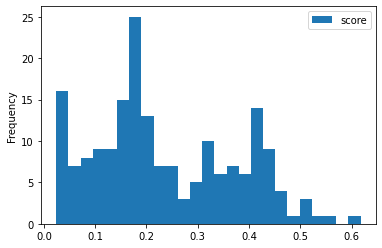

In [118]:
scores.plot(kind="hist", bins=25)

In [122]:
scores.sort_values(by="score", ascending=False, inplace=True)

In [133]:
scores.set_index("feature").transpose()[CATCOLS]

feature,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
score,0.408168,0.449818,0.190889,0.14299,0.202967,0.201567,0.120872,0.142744,0.213286,0.124187,0.207338


In [126]:

for i in range(scores.shape[0]):
    print(scores.iloc[i].feature, scores.iloc[i].score)

P_2 0.617505189043585
R_1 0.5530326553723249
D_48 0.5295061268917556
D_44 0.5201321765392717
B_9 0.5197216963533271
B_2 0.5138580948399069
D_61 0.493417849604965
D_75 0.4631432057534954
B_3 0.4615958401817553
D_55 0.4589400214092629
D_62 0.4533323838935789
B_38 0.4498176124096328
B_1 0.4463323025389073
B_37 0.445037677043968
B_7 0.4434378870880191
B_18 0.4407384956867923
B_23 0.4363929920755105
B_11 0.4341448583985742
D_74 0.4325018285776832
D_58 0.4304836540962537
S_25 0.4255730569270594
B_6 0.4213558927414298
B_10 0.4188997147425396
B_33 0.4182099767898408
B_20 0.4168810375724595
P_3 0.4165962092687051
D_39 0.415916956470467
R_10 0.4148703511886054
S_23 0.4146236816855438
D_78 0.4131480533886151
B_4 0.4092640384109716
B_30 0.4081677688374197
B_40 0.4072006048814324
D_77 0.40653624139649
B_16 0.399401775629653
B_17 0.3951588442258508
B_19 0.3905738126093643
S_3 0.3850795254092689
B_25 0.3802836019205967
B_22 0.3801117232894496
B_14 0.3762387395123195
S_7 0.3762301135620587
D_70 0.3692

In [139]:
scores[scores.score>0.35].feature.values

array(['P_2', 'R_1', 'D_48', 'D_44', 'B_9', 'B_2', 'D_61', 'D_75', 'B_3',
       'D_55', 'D_62', 'B_38', 'B_1', 'B_37', 'B_7', 'B_18', 'B_23',
       'B_11', 'D_74', 'D_58', 'S_25', 'B_6', 'B_10', 'B_33', 'B_20',
       'P_3', 'D_39', 'R_10', 'S_23', 'D_78', 'B_4', 'B_30', 'B_40',
       'D_77', 'B_16', 'B_17', 'B_19', 'S_3', 'B_25', 'B_22', 'B_14',
       'S_7', 'D_70', 'R_2', 'S_15', 'S_22', 'R_6', 'D_53'], dtype=object)